In [2]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [3]:
from fracridge import fracridge, vec_len

In [4]:
from sklearn.datasets import make_regression

In [5]:
from sklearn.linear_model import LinearRegression, Ridge

In [6]:
import scipy.io as sio

In [7]:
fracs = np.arange(0, 1.1, 0.1)

In [8]:
fracs

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

CPU times: user 224 ms, sys: 75 ms, total: 299 ms
Wall time: 47.5 ms
CPU times: user 211 ms, sys: 67.4 ms, total: 279 ms
Wall time: 42.1 ms
CPU times: user 172 ms, sys: 75.6 ms, total: 248 ms
Wall time: 41.8 ms
CPU times: user 186 ms, sys: 63.1 ms, total: 249 ms
Wall time: 43.3 ms
CPU times: user 183 ms, sys: 75.3 ms, total: 258 ms
Wall time: 42.5 ms
CPU times: user 147 ms, sys: 98.1 ms, total: 245 ms
Wall time: 43 ms
CPU times: user 202 ms, sys: 46.7 ms, total: 248 ms
Wall time: 38.1 ms
CPU times: user 195 ms, sys: 34.1 ms, total: 229 ms
Wall time: 34.7 ms


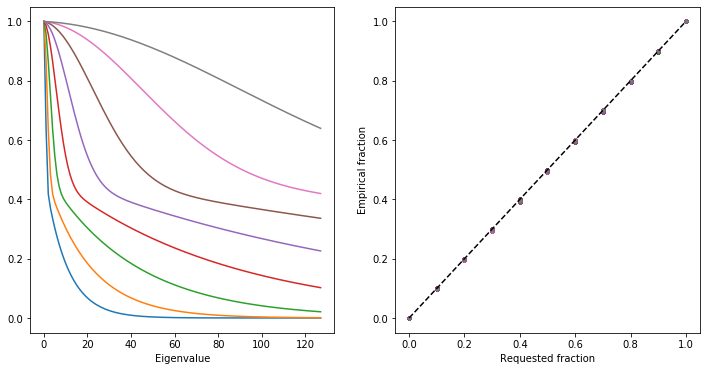

In [9]:
fig, ax = plt.subplots(1, 2)
ranks = [1, 2, 4, 8, 16, 32, 64, 128]
n_features = np.max(ranks)

for effective_rank in ranks:
    X, y = make_regression(
        n_samples=1000,
        n_features=n_features,
        n_informative=n_features,
        n_targets=500,
        bias=0.0,
        effective_rank=effective_rank,
        tail_strength=0.5,
        noise=0.0,
        shuffle=True,
        coef=False,
        random_state=None,)
#     sio.savemat(f'/Users/arokem/tmp/rr/Xy_rank{effective_rank}.mat', 
#                 dict(X=X, y=y))s
    uu, selt, vv = svd(X, full_matrices=False)
    ax[0].plot(selt)
    %time coef, alphas = fracridge(X, y, fracs=fracs)
    hols = LinearRegression().fit(X,y).coef_.T
    kk = 0
    empirical_fracs = np.empty(len(fracs) * hols.shape[-1])
    intended_fracs = np.empty(len(fracs) * hols.shape[-1])
    for ii in range(len(fracs)):
        for jj in range (hols.shape[-1]):
            empirical_fracs[kk] = vec_len(coef[:, ii, jj]) / vec_len(hols[:, jj])
            intended_fracs[kk] = fracs[ii]
            kk += 1
    ax[1].plot(intended_fracs, empirical_fracs,  '.', alpha=0.1)

ax[1].plot([0, 1], [0,1], 'k--')
ax[0].set_xlabel('Eigenvalue')
ax[1].set_xlabel('Requested fraction')
ax[1].set_ylabel('Empirical fraction')
fig.set_size_inches([12, 6])

In [9]:
%%time
coef, alphas = fracridge(X, y, fracs=fracs)

CPU times: user 997 ms, sys: 303 ms, total: 1.3 s
Wall time: 273 ms


In [10]:
hols = LinearRegression().fit(X,y).coef_.T

In [11]:
import pandas as pd
import seaborn as sns

In [12]:
# pp, ff, bb
kk = 0
empirical_fracs = np.empty(len(fracs) * hols.shape[-1])
intended_fracs = np.empty(len(fracs) * hols.shape[-1])
for ii in range(len(fracs)):
    for jj in range (hols.shape[-1]):
        empirical_fracs[kk] = vec_len(coef[:, ii, jj]) / vec_len(hols[:, jj])
        intended_fracs[kk] = fracs[ii]
        kk += 1


In [13]:
df = pd.DataFrame(data = np.stack([intended_fracs, empirical_fracs]).T, columns=['fracs', 'empirical_fracs'])

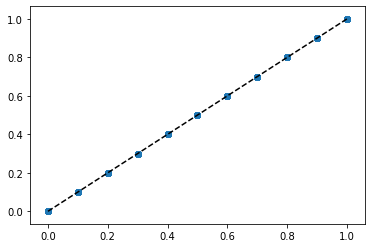

In [14]:
plt.scatter(intended_fracs, empirical_fracs)
plt.plot([0, 1], [0,1], 'k--')